<a href="https://colab.research.google.com/github/dvarkless/InnopolisDS/blob/main/homeworks/Seasonal_ARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonal ARIMA Models


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutup
from copy import deepcopy
import  pmdarima as pm

%matplotlib inline

shutup.please()
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

### Misc settings

In [ ]:
from pathlib import Path

DATA_PATH = Path('~/TempColab/datas').expanduser()

## Seasonal time series
Сезонные данные
     - Имеет предсказуемые и повторяющиеся шаблоны
     - Повторяется через любое количество времени
- Сезонное разложение
     - временной ряд = тренд + сезонность + остатки

### Seasonal decompose
Вы можете представить себе временной ряд как состоящий из трендовых, сезонных и остаточных компонентов. Это может быть хорошим способом подумать о данных, когда вы приступите к их моделированию. Если вы знаете период временного ряда, вы можете разложить его на эти компоненты.

В этом упражнении вы разложите временной ряд, показывающий ежемесячное производство молока на одну корову в США. Это даст вам более четкое представление о тренде и сезонном цикле. Поскольку данные ежемесячные, вы можете догадаться, что сезонность может составлять 12 периодов времени, однако это не всегда так.

In [ ]:
milk_production = pd.read_csv(DATA_PATH / 'milk_production.csv', index_col='Month', parse_dates=True)
milk_production.columns = ['_','pounds_per_cow']
milk_production = milk_production.drop('_', axis=1)
# milk_production = milk_production.asfreq('MS')
milk_production.head()

,pounds_per_cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


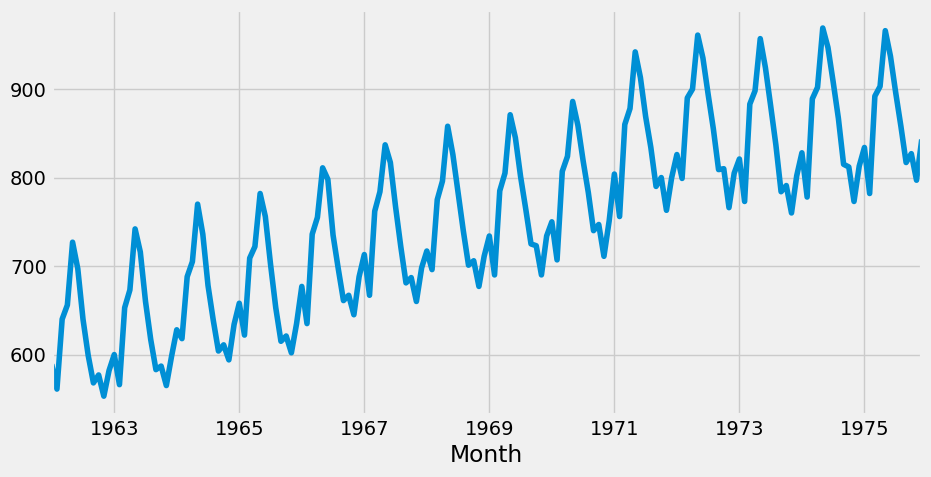

In [ ]:
_ = milk_production.pounds_per_cow.plot()

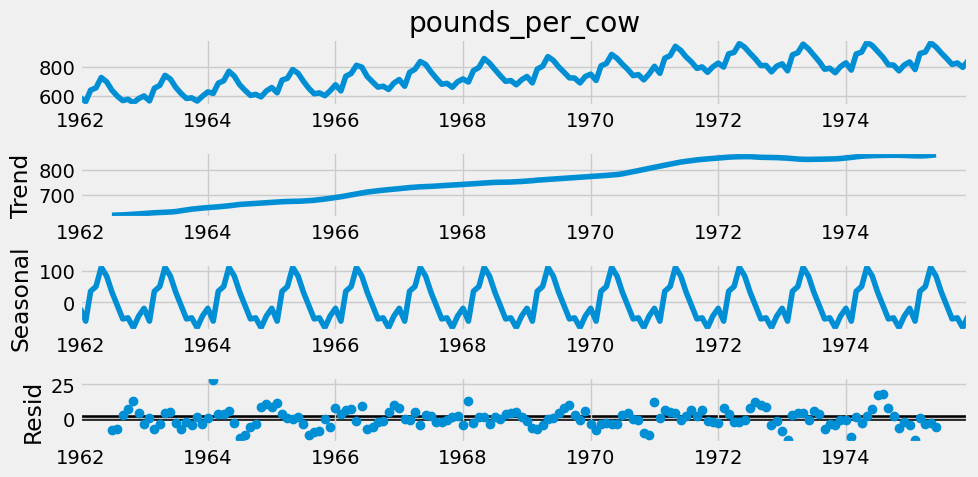

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot();
plt.tight_layout();

In [ ]:
model_cow = pm.auto_arima(deepcopy(milk_production),
                      seasonal=True, m=12,
                      d=1, D=1,
                      max_p=5, max_q=5,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
model_cow.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1070.222, Time=1.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1119.969, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1081.584, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1066.296, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1114.995, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1068.030, Time=0.34 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1067.976, Time=0.61 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1082.123, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1072.280, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1068.064, Time=0.33 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1067.796, Time=0.26 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1066.207, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1114.845, Time=0.05 sec
 ARIMA(1,1,0)(1,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Sat, 15 Oct 2022   AIC                           1066.207
Time:                                      17:25:39   BIC                           1075.337
Sample:                                  01-01-1962   HQIC                          1069.916
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

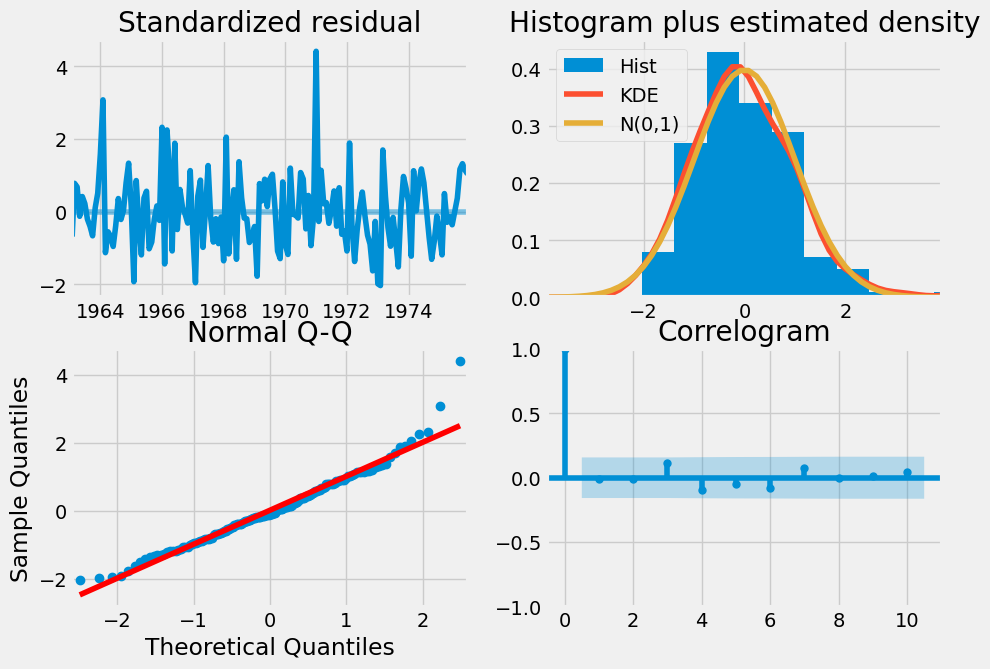

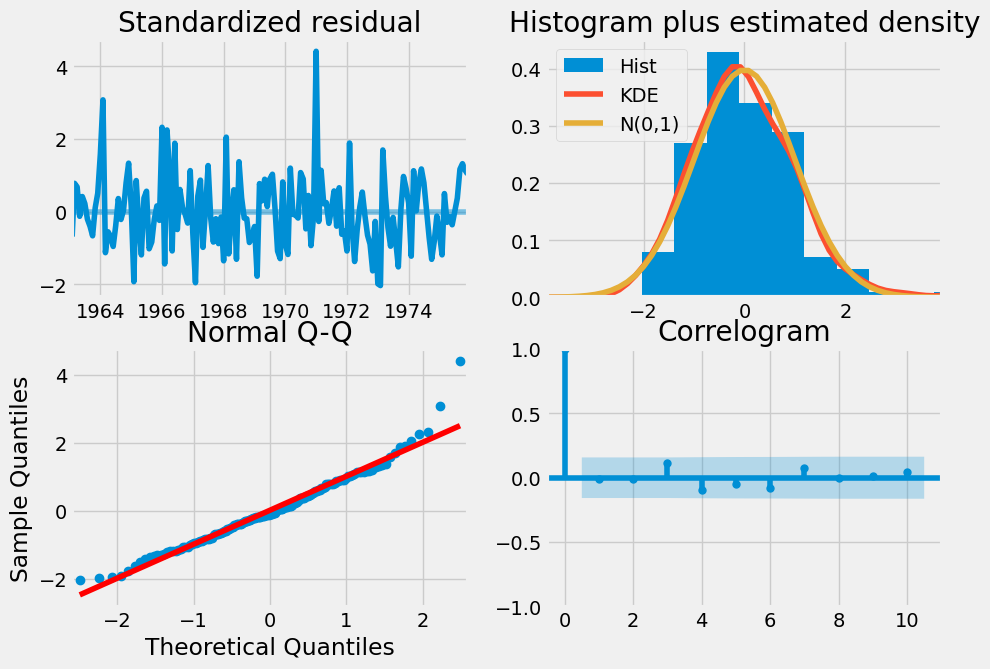

In [ ]:
model_cow.plot_diagnostics(figsize=(10,7))

## SARIMA models
- Seasonal ARIMA = SARIMA
$$ \text{SARIMA}(p, d, q)(P, D, Q)_S $$
    - Non-seasonal orders
        - p: autoregressive order
        - d: differencing order
        - q: moving average order
    - Seasonal orders
        - P: seasonal autoregressive order
        - D: seasonal differencing order
        - Q: seasonal moving average order
        - S: Number of time steps per cycle
- The SARIMA model
    - ARIMA(2, 0, 1) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t $$
    - $\text{SARIMA}(0,0,0)(2, 0, 1)_7$ model:
$$ y_t = a_7 y_{t-7} + a_{14} y_{t-14} + m_y \epsilon_{t-7} + \epsilon_t $$

- Seasonal differencing
    - Subtract the time series value of one season ago
$$ \Delta y_t = y_t - y_{t-S} $$

In [ ]:
df1 = pd.read_csv(DATA_PATH / 'AirPassengers.csv', index_col=0, parse_dates=True)

In [ ]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


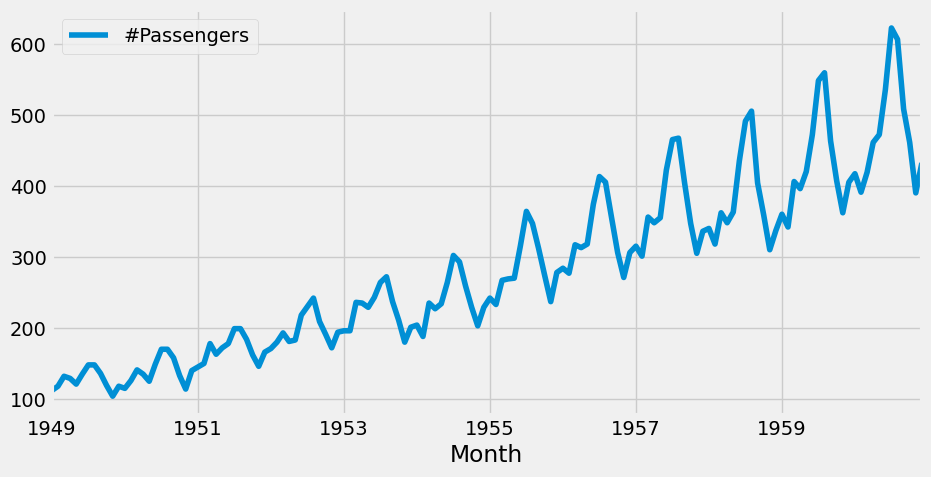

In [ ]:
_ = df1.plot()

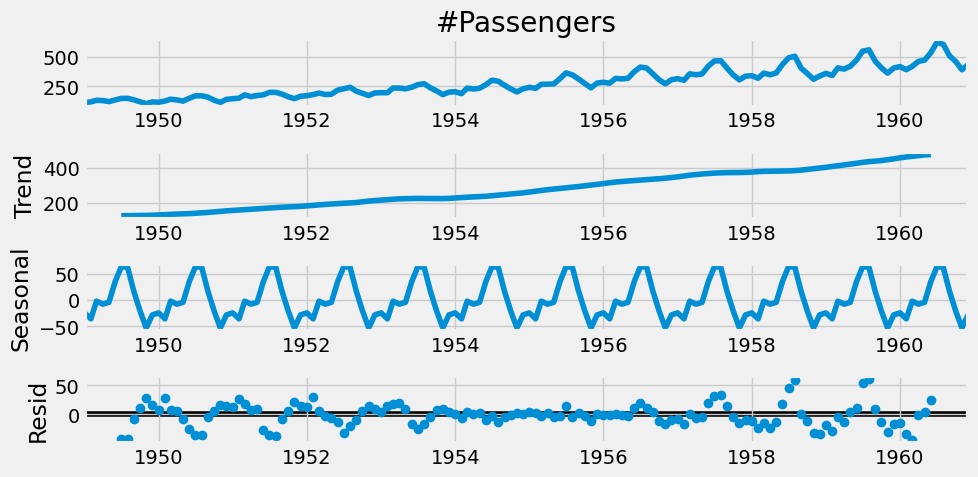

In [ ]:
decomp = seasonal_decompose(df1['#Passengers'], period=12)

# Plot decomposition
decomp.plot();
plt.tight_layout();

In [ ]:
model_plane = pm.auto_arima(deepcopy(df1),
                      seasonal=True, m=12,
                      d=1, D=1,
                      max_p=5, max_q=5,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
# Fit the model
model_plane.summary()
# Print the results summary

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.17 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.68 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.16 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.65 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.60 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.53 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.11 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sat, 15 Oct 2022   AIC                           1017.847
Time:                                     17:29:43   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3132     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

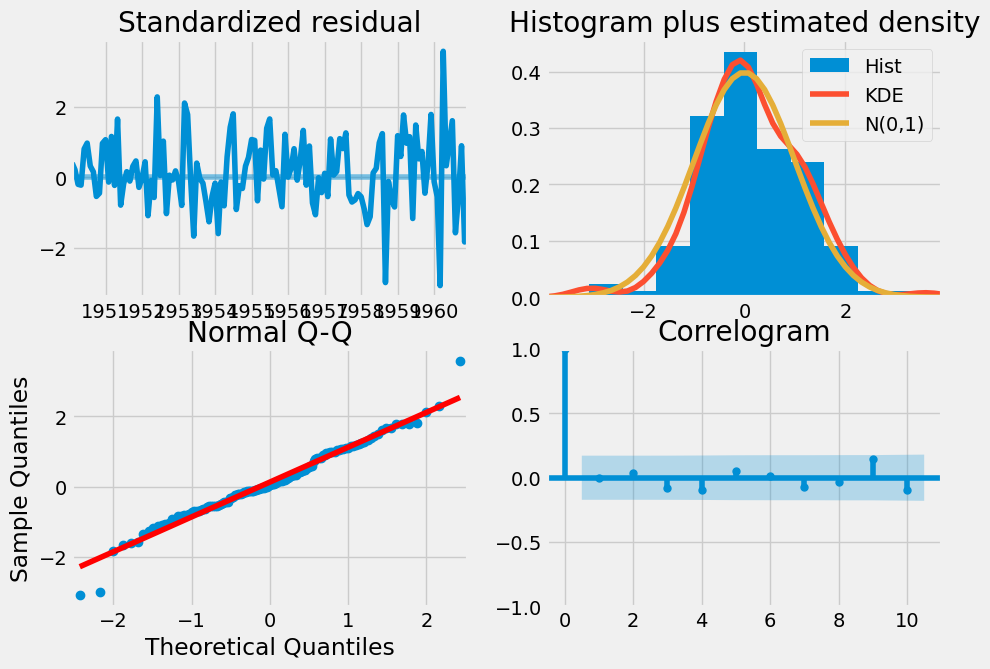

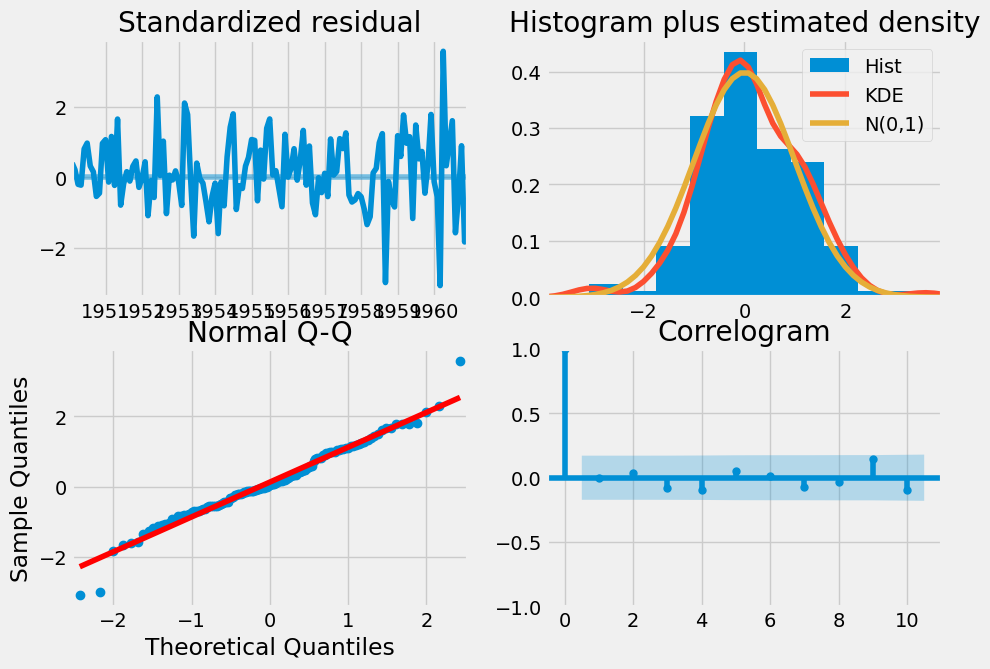

In [ ]:
model_plane.plot_diagnostics(figsize=(10,7))

In [ ]:
aus_employment = pd.read_csv(DATA_PATH / 'aus_employment.csv', index_col='date', parse_dates=True)
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


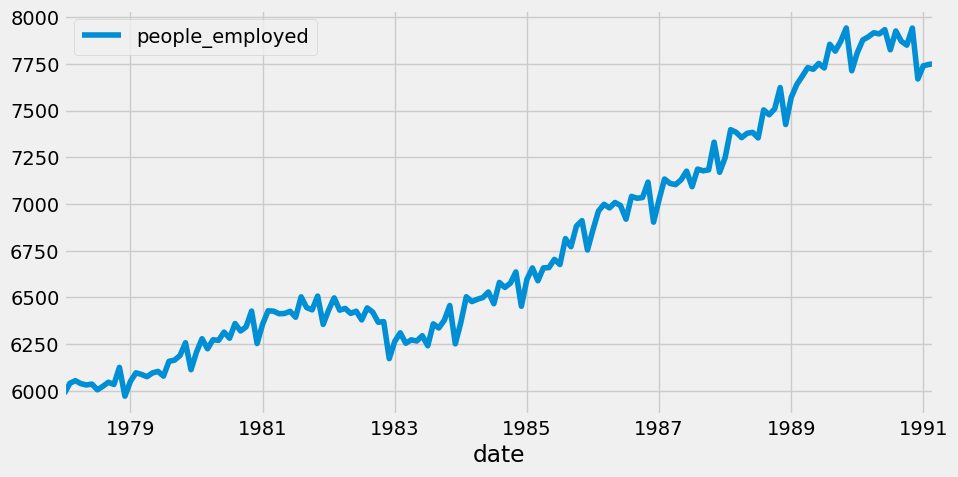

In [ ]:
_ = aus_employment.plot()

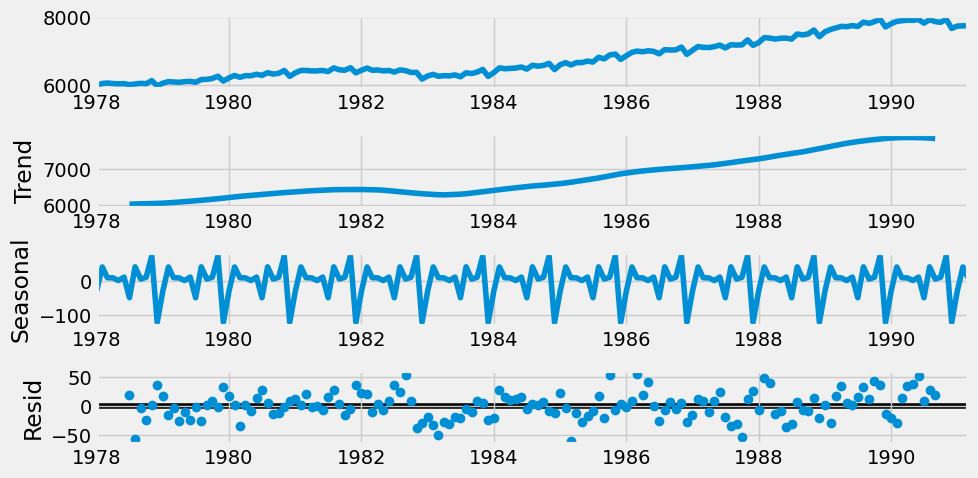

In [ ]:
# Perform additive decomposition
decomp = seasonal_decompose(aus_employment, period=12)

# Plot decomposition
decomp.plot();

<AxesSubplot:xlabel='date'>

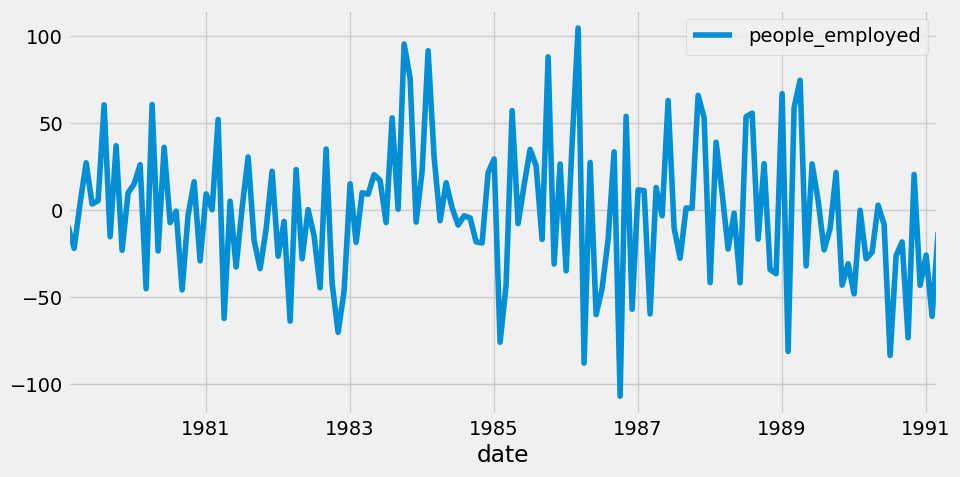

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

aus_employment_diff.plot()

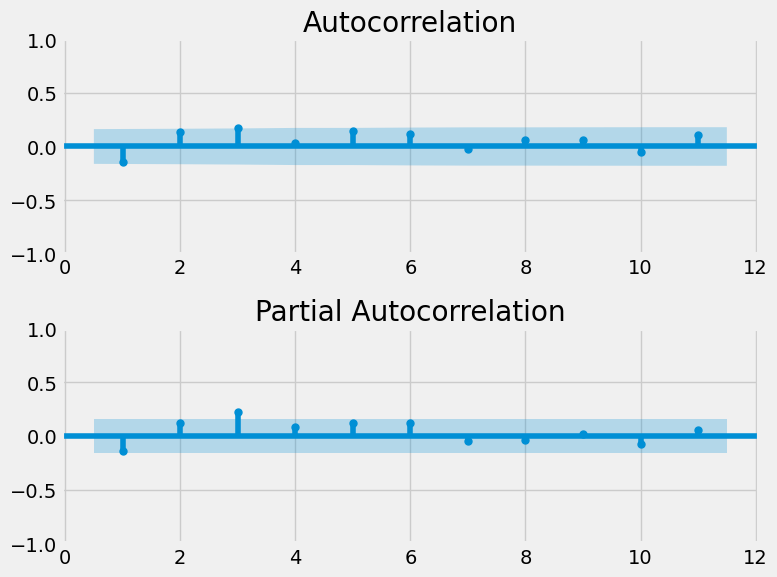

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2);
plt.tight_layout();

In [ ]:
# Create auto_arima model

model_employ = pm.auto_arima(deepcopy(aus_employment_diff),
                      seasonal=True, m=60,
                      d=1, D=1,
                      max_p=5, max_q=5,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model_employ.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[60]             : AIC=inf, Time=41.02 sec
 ARIMA(0,1,0)(0,1,0)[60]             : AIC=994.337, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[60]             : AIC=inf, Time=4.68 sec
 ARIMA(0,1,1)(0,1,1)[60]             : AIC=inf, Time=13.28 sec
 ARIMA(0,1,0)(1,1,0)[60]             : AIC=inf, Time=3.73 sec
 ARIMA(0,1,0)(0,1,1)[60]             : AIC=inf, Time=7.19 sec
 ARIMA(0,1,0)(1,1,1)[60]             : AIC=984.007, Time=20.43 sec
 ARIMA(0,1,0)(2,1,1)[60]             : AIC=inf, Time=67.08 sec
 ARIMA(0,1,0)(1,1,2)[60]             : AIC=inf, Time=22.27 sec
 ARIMA(0,1,0)(0,1,2)[60]             : AIC=inf, Time=39.31 sec
 ARIMA(0,1,0)(2,1,0)[60]             : AIC=inf, Time=55.16 sec
 ARIMA(0,1,0)(2,1,2)[60]             : AIC=inf, Time=70.89 sec
 ARIMA(1,1,0)(1,1,1)[60]             : AIC=953.972, Time=24.31 sec
 ARIMA(1,1,0)(0,1,1)[60]             : AIC=inf, Time=13.68 sec
 ARIMA(1,1,0)(2,1,1)[60]             : AIC=inf, Time=71.55 sec
 ARI

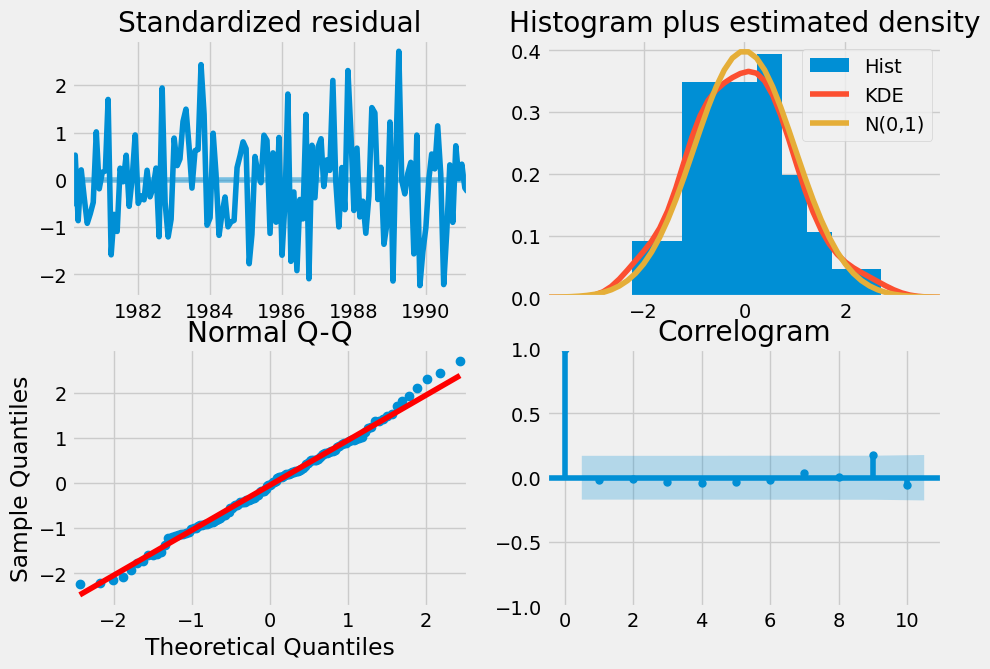

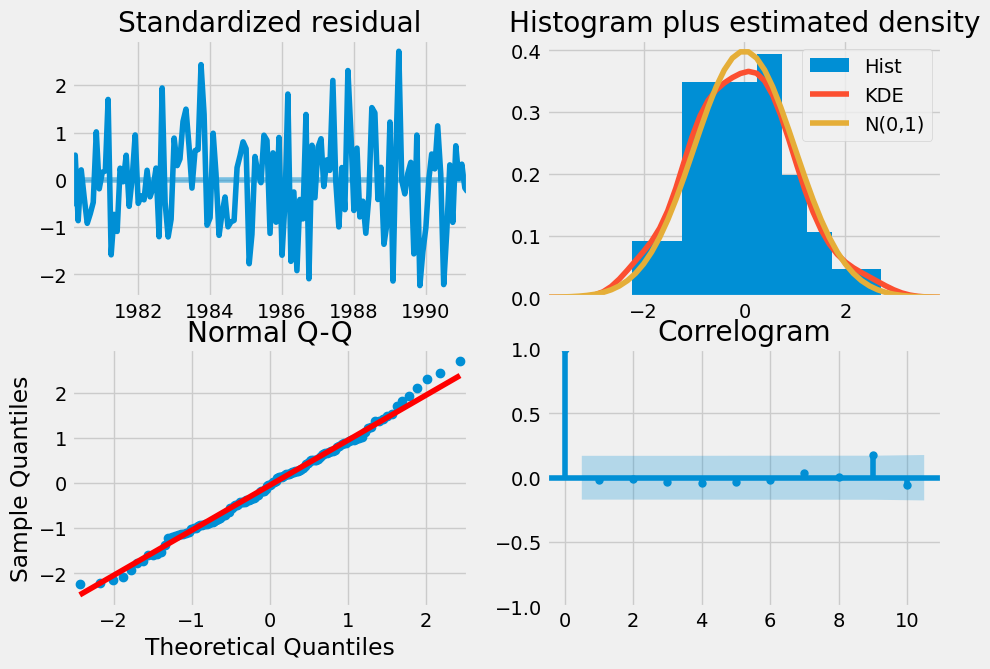

In [ ]:
model_employ.plot_diagnostics(figsize=(10,7))

### Saving and updating models
После того, как вы получили модель, которая вас устраивает, вы захотите сохранить эту модель, а также включить новые измерения, когда они будут доступны. Это ключевая часть запуска модели в производство.


In [ ]:
import joblib

# Set model name
filename=DATA_PATH / 'cow_model.pkl'

# Pickle it
joblib.dump(model_cow, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 4)   Log Likelihood                -600.103
Date:                           Thu, 29 Sep 2022   AIC                           1210.206
Time:                                   17:57:34   BIC                           1225.675
Sample:                               01-01-1962   HQIC                          1216.486
                                    - 12-01-1975                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1936      0.065     -2.994      0.003      -0.320      -0.067
ar.S.L4       -0.9958      0.010   -103.757      0.000      -1.015      -0.977
ar.S.L8       -0.9937      0.005   -206.473      0.000      -1.003      -0.984
ma.S.L4       -0.0820      0.104     -0.787      0.431      -0.286       0.122
sigma2        72.4468      5.515     13.137      0.000      61.638      83.255
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                45.13
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.33
Prob(H) (two-sided):                  0.76   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Добавление дней недели в модели

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

milk_production = pd.read_csv(DATA_PATH / 'milk_production.csv', index_col='Month', parse_dates=True)
milk_production.columns = ['_','pounds_per_cow']
milk_production = milk_production.drop('_', axis=1)
# milk_production = milk_production.asfreq('MS')
milk_production.head()

weekdays = [day.weekday() for day in milk_production.index]

cow_model = SARIMAX(milk_production, exog=weekdays, order=(1,1,0), seasonal_order=(0, 1, 1, 12), trend='c')
results = cow_model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18482D+00    |proj g|=  3.10489D-02

At iterate    5    f=  3.15544D+00    |proj g|=  7.58546D-03


 This problem is unconstrained.



At iterate   10    f=  3.15521D+00    |proj g|=  3.61826D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     12      1     0     0   3.618D-06   3.155D+00
  F =   3.1552129627567616     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       pounds_per_cow   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.076
Date:                              Sat, 15 Oct 2022   AIC                           1070.152
Time:                                      17:26:33   BIC                           1085.369
Sample:                                  01-01-1962   HQIC                          1076.332
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0203      0.288     -0.070      0.944      -0.584       0.544
x1             0.0377      0.191      0.197      0.844      -0.337       0.412
ar.L1         -0.2242      0.080     -2.813      0.005      -0.380      -0.068
ma.S.L12      -0.6190      0.072     -8.598      0.000      -0.760      -0.478
sigma2        52.6727      5.168     10.192      0.000      42.544      62.802
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                34.30
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

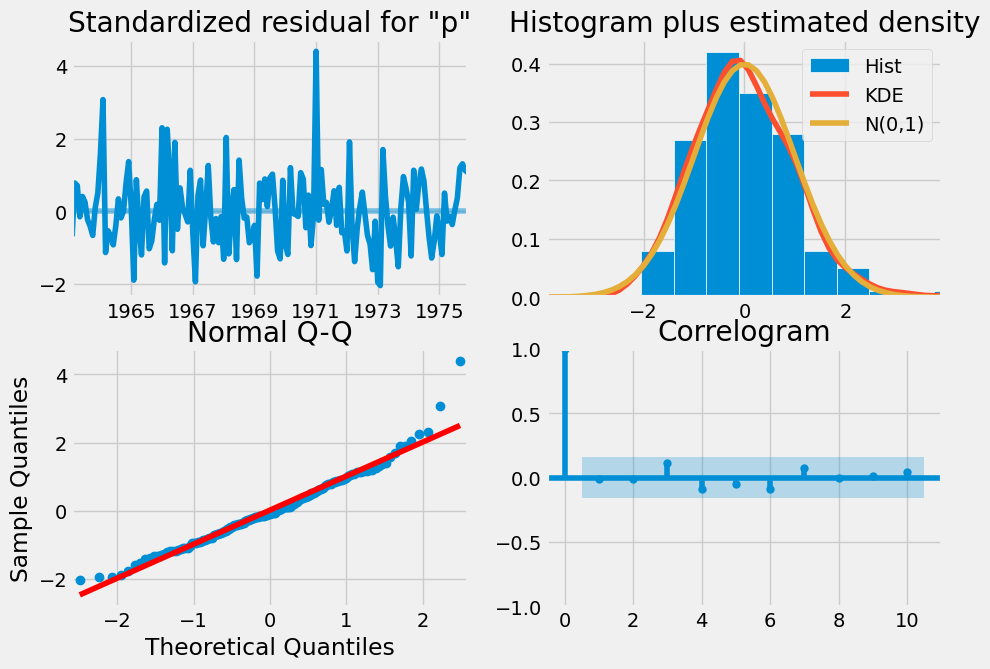

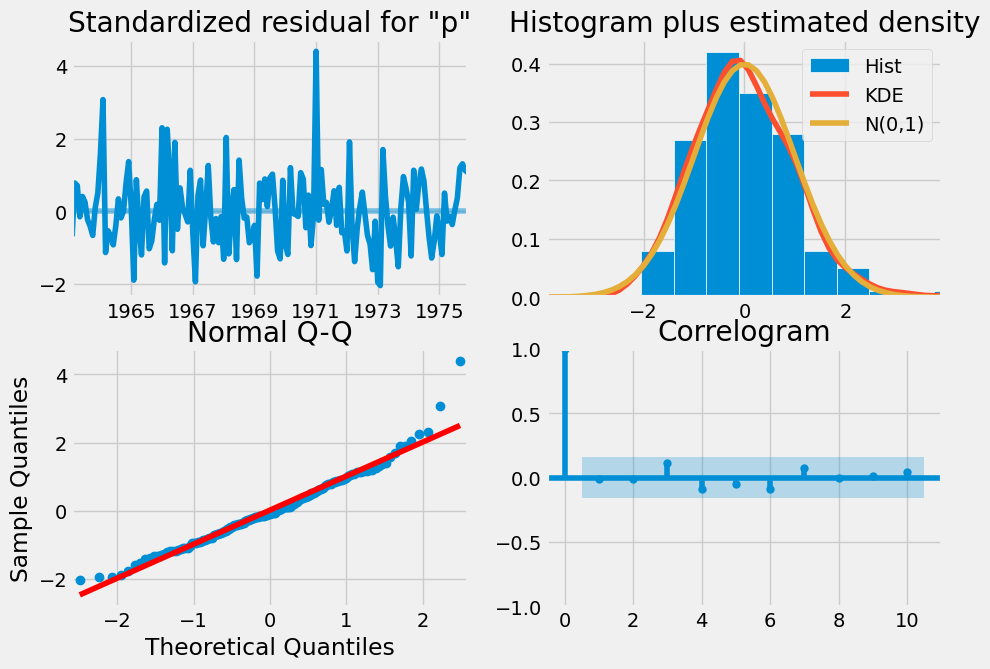

In [ ]:
results.plot_diagnostics(figsize=(10,7))

In [ ]:
plane_data = pd.read_csv(DATA_PATH / 'AirPassengers.csv', index_col=0, parse_dates=True)

weekdays = [day.weekday() for day in plane_data.index]

plane_model = SARIMAX(plane_data, exog=weekdays, order=(2,1,0), seasonal_order=(0, 1, 0, 12), trend='c')
results = plane_model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48209D+00    |proj g|=  2.20481D-03

At iterate    5    f=  3.48204D+00    |proj g|=  1.27015D-03

At iterate   10    f=  3.48203D+00    |proj g|=  2.11220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   4.506D-06   3.482D+00
  F =   3.4820250524442447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -501.412
Date:                            Sat, 15 Oct 2022   AIC                           1012.823
Time:                                    17:37:05   BIC                           1027.199
Sample:                                01-01-1949   HQIC                          1018.665
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2238      0.982      0.228      0.820      -1.702       2.149
x1             1.0000      0.295      3.384      0.001       0.421       1.579
ar.L1         -0.2857      0.079     -3.606      0.000      -0.441      -0.130
ar.L2          0.0274      0.099      0.277      0.782      -0.166       0.221
sigma2       123.5407     15.411      8.016      0.000      93.336     153.746
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.99   Prob(JB):                         0.50
Heteroskedasticity (H):               1.82   Skew:                             0.10
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

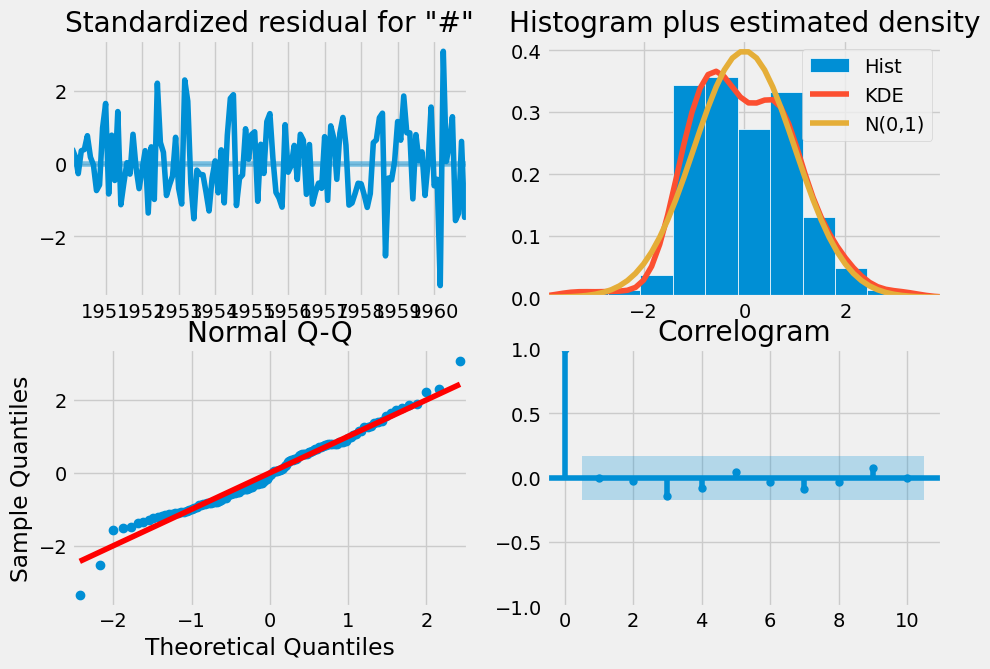

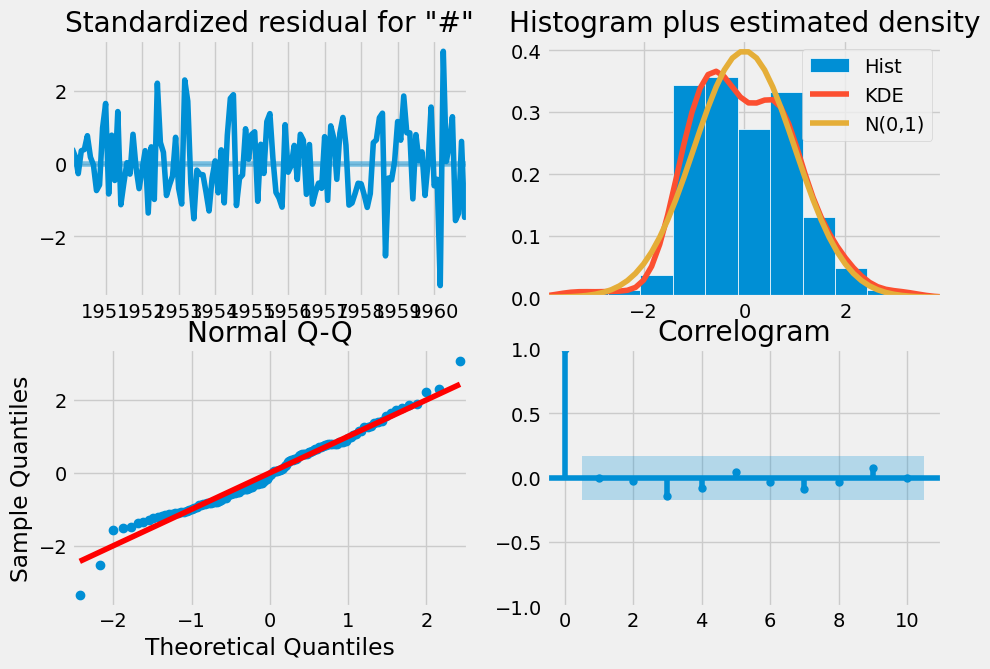

In [ ]:
results.plot_diagnostics(figsize=(10,7))

In [ ]:
weekdays = [day.weekday() for day in aus_employment_diff.index]

employment_model = SARIMAX(deepcopy(aus_employment_diff), exog=weekdays, order=(1,1,0), seasonal_order=(0, 1, 2, 60), trend='c')
results = employment_model.fit()
results.summary()

/home/dvarkless/.venvs/jupyter/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28311D+00    |proj g|=  1.11631D-01

At iterate    5    f=  3.25740D+00    |proj g|=  1.93330D-02

At iterate   10    f=  3.25553D+00    |proj g|=  9.21862D-03

At iterate   15    f=  3.24534D+00    |proj g|=  7.00722D-03

At iterate   20    f=  3.23833D+00    |proj g|=  6.26573D-03

At iterate   25    f=  3.23806D+00    |proj g|=  2.68155D-04

At iterate   30    f=  3.23805D+00    |proj g|=  1.20324D-04

At iterate   35    f=  3.23805D+00    |proj g|=  3.55895D-05

At iterate   40    f=  3.23804D+00    |proj g|=  1.61054D-04

At iterate   45    f=  3.23804D+00    |proj g|=  1.31128D-04

At iterate   50    f=  3.23804D+00    |proj g|=  1.04152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                         people_employed   No. Observations:                  146
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 60)   Log Likelihood                -472.754
Date:                                 Sat, 15 Oct 2022   AIC                            957.508
Time:                                         18:11:07   BIC                            972.164
Sample:                                     02-01-1979   HQIC                           963.403
                                          - 03-01-1991                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.5979      5.156     -0.504      0.614     -12.703       7.508
x1             1.0335      2.274      0.455      0.649      -3.423       5.490
ar.L1         -0.5702      0.102     -5.583      0.000      -0.770      -0.370
ma.S.L60      -1.1715    637.030     -0.002      0.999   -1249.726    1247.383
ma.S.L120      0.2895    118.293      0.002      0.998    -231.560     232.139
sigma2      1856.1948   1.18e+06      0.002      0.999   -2.31e+06    2.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.35   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.01   Prob(JB):                         0.57
Heteroskedasticity (H):               3.12   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

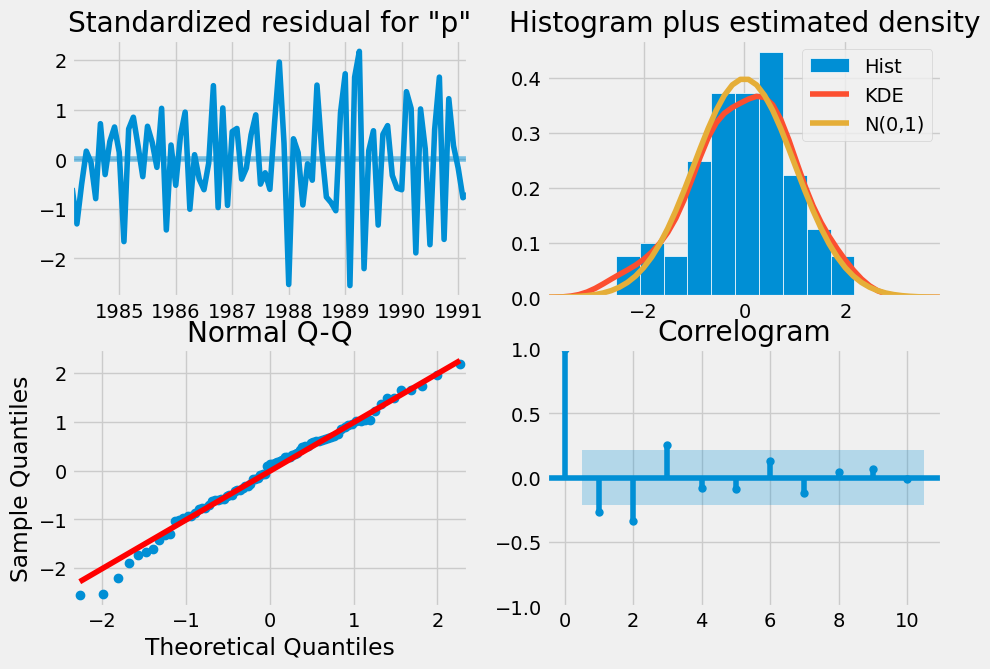

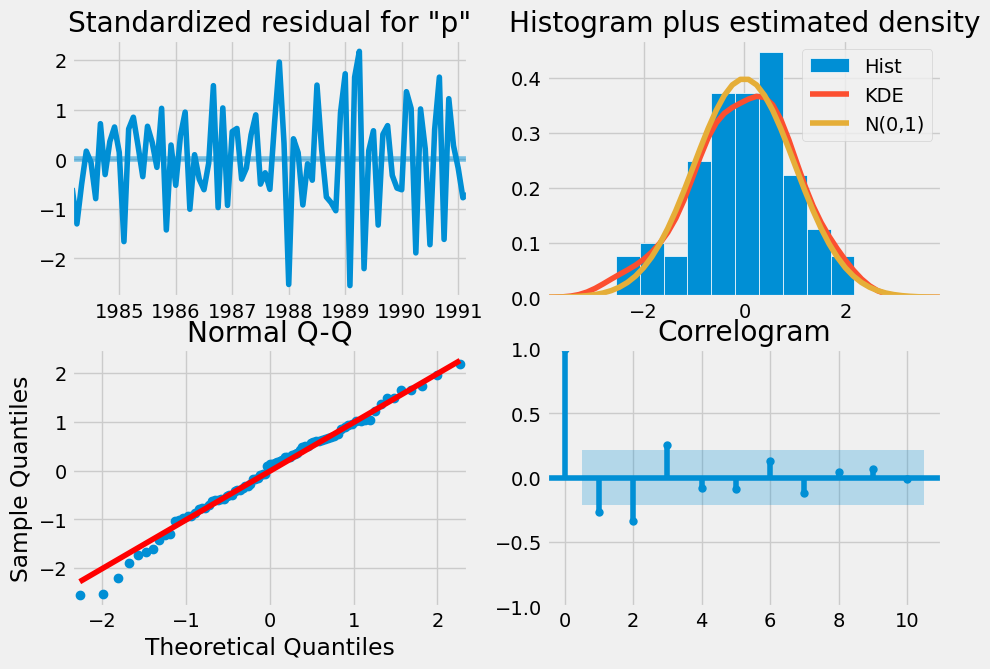

In [ ]:
results.plot_diagnostics(figsize=(10,7))

### Вывод

Создал модели SARIMA для трех датасетов. Коэффициенты подобрал с помощью autoARIMA.
  
Полученные метрики (AIC):  
milk production: 1066    
airPassengers: 1017    
AUC employment: 954    

  
Метрики при учитывании дней недели в SARIMAX:  
milk production: 1070    
airPassengers: 1012    
AUC employment: 957    

Как видно, это изменение оказало незначительное влияние.


### The SARIMAX model

**S** - seasonal\
**AR** - AutoRegressive\
**I** - Integrated\
**MA** - Moving Average\
**X** - Exogenous
